In [127]:
# imports
import pandas as pd
import numpy as np

In [128]:
# configs
import warnings
warnings.filterwarnings("ignore")

In [129]:
# read csvs & build dataframe
df = pd.DataFrame()
df_temp = pd.read_csv('./datasets/temperatura_featured.csv')
df_vendas = pd.read_csv('./datasets/vendas.csv', ';')
df_conc = pd.read_csv('./datasets/concorrentes.csv', ';')

In [130]:
# pre-processing
def get_dias_fechados():
    return ['2018-03-30', '2018-11-02', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-04-19', '2019-11-02', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_fds():
    return ['Sunday', 'Saturday']

def get_dias_feriados():
    return ['2018-03-30', '2018-04-21', '2018-04-30', '2018-05-01', '2018-05-31', '2018-06-01', '2018-09-07', '2018-10-12', '2018-11-02', '2018-11-15', '2018-11-16', '2018-12-24', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', 
'2019-01-01', '2019-03-04', '2019-03-05', '2019-04-19', '2019-04-21', '2019-05-01', '2019-06-20', '2019-06-21', '2019-09-07', '2019-10-12', '2019-11-02', '2019-11-15', '2019-12-25', '2019-12-25', '2019-12-25', '2019-12-30', '2019-12-31', 
'2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_festivos():
    return ['2018-05-13', '2018-08-12', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-05-12', '2019-08-11', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_vesperas_dias_festivos():
    vesperas = []
    for i in range(len(get_dias_festivos())):
        vesperas_dia_festivo_current = pd.Series(pd.date_range(end=get_dias_festivos()[i], periods=5, closed='left'))
        for j in range(len(vesperas_dia_festivo_current)):
            vesperas.append(vesperas_dia_festivo_current[j])
    return vesperas

def get_pos_dias_festivos():
    pos = []
    for i in range(len(get_dias_festivos())):
        pos_dia_festivo_current = pd.Series(pd.date_range(get_dias_festivos()[i], periods=3, closed='right'))
        for j in range(len(pos_dia_festivo_current)):
            pos.append(pos_dia_festivo_current[j])
    return pos

def get_dias_acerca_pagamento():
    return [5,6,7,8,9,10,28,29,30,31]

def get_meses_baixas_temporadas():
    return [1, 2]

df.insert(loc=0, column='DATA', value=(pd.to_datetime(df_vendas['DATA']).dt.strftime("%Y%m%d")))
df.insert(loc=1, column='VENDAS', value=(df_vendas['VENDAS'].fillna(0).astype(int)))
df.insert(loc=2, column='IS_FECHADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados()).astype(int)))
df.insert(loc=3, column='IS_FDS', value=(pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=4, column='IS_FERIADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=5, column='IS_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())).astype(int))
df.insert(loc=6, column='IS_VESPERA_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())).astype(int))
df.insert(loc=7, column='IS_POS_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos())).astype(int))
df.insert(loc=8, column='IS_SEMANA_PAGAMENTO', value=(pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento()).astype(int)))
df.insert(loc=9, column='IS_BAIXA_TEMPORADA', value=(pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas()).astype(int)))
df.insert(loc=10, column='QTD_CONCORRENTES', value=(df_conc['CONCORRENTES'].fillna(0).astype(int)))
df.insert(loc=11, column='PRECIPITACAO', value=(df_temp['PRECIPITACAO']))
df.insert(loc=12, column='TEMPERATURA', value=(df_temp['TEMPERATURA']))
df.insert(loc=13, column='UMIDADE', value=(df_temp['UMIDADE']))

# removing outliers
df = df.query('IS_FECHADO == 0')
df = df.drop(columns=['IS_FECHADO'])

In [131]:
df = df.query('DATA >= "20180401" and DATA <= "20180430"')
df = df.sort_values(by='DATA')

In [146]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# featured engineering
X = df.drop(columns=['DATA', 'VENDAS'])
y = df.drop(columns=['DATA', 'IS_FDS', 'IS_FERIADO', 'IS_DATA_FESTIVA', 'IS_VESPERA_DATA_FESTIVA', 'IS_POS_DATA_FESTIVA', 'IS_SEMANA_PAGAMENTO', 'IS_BAIXA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])

# standardization & normalization
X = preprocessing.scale(X)

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

array([[ 1.45296631, -0.2773501 ,  0.        ,  0.        ,  0.        ,
        -0.34641016,  0.        , -0.54258999, -0.41072177,  1.33310474,
         0.45747389],
       [-0.6882472 , -0.2773501 ,  0.        ,  0.        ,  0.        ,
        -0.34641016,  0.        , -0.54258999, -0.14892838,  0.04039711,
         1.20769136],
       [-0.6882472 , -0.2773501 ,  0.        ,  0.        ,  0.        ,
        -0.34641016,  0.        , -0.54258999, -0.41072177, -0.1442754 ,
         0.92983304],
       [-0.6882472 , -0.2773501 ,  0.        ,  0.        ,  0.        ,
        -0.34641016,  0.        ,  0.83854816, -0.41072177, -1.66782368,
         0.34633056],
       [-0.6882472 , -0.2773501 ,  0.        ,  0.        ,  0.        ,
        -0.34641016,  0.        ,  0.83854816, -0.41072177, -3.21445602,
         1.20769136],
       [ 1.45296631, -0.2773501 ,  0.        ,  0.        ,  0.        ,
        -0.34641016,  0.        ,  0.83854816, -0.41072177, -1.02146987,
        -0.098

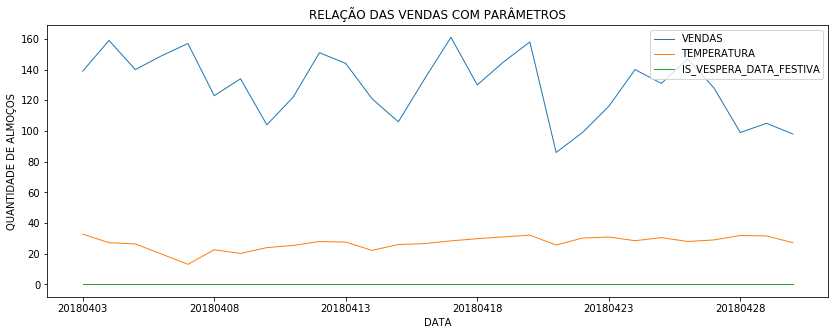

In [147]:
import mpld3
import matplotlib.style as style
import matplotlib.pyplot as plt

# plot chart
mpld3.enable_notebook()
df.plot(y=['VENDAS', 'TEMPERATURA', 'IS_VESPERA_DATA_FESTIVA'], x='DATA', figsize=(14, 5), linestyle='solid', linewidth=1, markersize=1)
plt.legend(loc=1)
plt.title('RELAÇÃO DAS VENDAS COM PARÂMETROS')
plt.xlabel('DATA')
plt.ylabel('QUANTIDADE DE ALMOÇOS')
plt.show()

In [134]:
df

,DATA,VENDAS,IS_FDS,IS_FERIADO,IS_DATA_FESTIVA,IS_VESPERA_DATA_FESTIVA,IS_POS_DATA_FESTIVA,IS_SEMANA_PAGAMENTO,IS_BAIXA_TEMPORADA,QTD_CONCORRENTES,PRECIPITACAO,TEMPERATURA,UMIDADE
18,20180403,139,1,0,0,0,0,0,0,8,0.0,32.8,80.25
49,20180404,159,0,0,0,0,0,0,0,8,1.4,27.2,87.00
79,20180405,140,0,0,0,0,0,0,0,8,0.0,26.4,84.50
110,20180406,149,0,0,0,0,0,0,0,9,0.0,19.8,79.25
140,20180407,157,0,0,0,0,0,0,0,9,0.0,13.1,87.00
171,20180408,123,1,0,0,0,0,0,0,9,0.0,22.6,75.25
202,20180409,134,0,0,0,0,0,0,0,10,3.5,20.2,84.00
232,20180410,104,0,0,0,0,0,0,0,10,1.1,24.0,63.00
263,20180411,122,1,0,0,0,0,0,0,10,1.6,25.4,69.50
293,20180412,151,0,0,0,0,0,0,0,10,0.0,28.0,50.50


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 18 to 75
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA                     28 non-null     object 
 1   VENDAS                   28 non-null     int64  
 2   IS_FDS                   28 non-null     int64  
 3   IS_FERIADO               28 non-null     int64  
 4   IS_DATA_FESTIVA          28 non-null     int64  
 5   IS_VESPERA_DATA_FESTIVA  28 non-null     int64  
 6   IS_POS_DATA_FESTIVA      28 non-null     int64  
 7   IS_SEMANA_PAGAMENTO      28 non-null     int64  
 8   IS_BAIXA_TEMPORADA       28 non-null     int64  
 9   QTD_CONCORRENTES         28 non-null     int64  
 10  PRECIPITACAO             28 non-null     float64
 11  TEMPERATURA              28 non-null     float64
 12  UMIDADE                  28 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 3.1+ KB


In [136]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1) 
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy

0.06456147566537707

In [137]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0, fit_intercept=True, n_jobs=-1)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy

0.0

In [138]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500, alpha=1800).fit(X_train, y_train)
regr.predict(X_test[:2])
accuracy = regr.score(X_test, y_test)
accuracy

-27.573391101216572

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
linear_regression = LinearRegression(n_jobs=-1)
pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
pipeline.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy

0.0

In [140]:
########################################## PERGUNTAS
# Está boa a separação de dados 70:30 ? - nao está ok -> menor possivel de teste (10% max)
# Devo usar algo de cross-validation? - talvez usar

# Devo separar o meu dataframe por tipo de dado (binário, quantitativo, sequencial...) ?
# Preciso normalizar os as features que são do tipo binario (x)?  E qual o melhor jeito já que int > bool (vendas > is_fds) ?
# ---- mudar o tipo de dado (os que sao binarios -> tlvz colocar string)
# ---- alguns modelos sao mais succetiveis 
# ---- tlvz normalizar para: 0-1 / zscore

# Preciso especificar os pesos do meus parametros de acordo com a importancia ? E como fazer?
# ---- nao

# Uma vez que conheco minha label (y), está certo eu excluir os ...Classifiers?
# ---- sim! verdade 'absoluta'

# Para regressao normalmente se usa outras metricas de score
# ---- RMSE, MSE, SSE (calcular o valor do previsto x esperado)
# ---- "metrics for regression" - google

# Como saber se meu score nao está sendo binário? É OK usar para saber a acurácia do modelo ?
# ---- tlvz o score nao sirva 

# Por que a adição da coluna DATA, faz mudar tanto?
# ---- motivo: o modelo ta fazendo relacionamento 1:1 como se ja tivesse as infos do dia de amanha

# Baseado no tipo de dado que possuo, o que voces sugerem?
# ---- DecisionTreeRegressor / GradientBoostingRegressor
# ---- MLP precisa de muito dado -> tlvz nao sirva
# ---- https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html

# Acham que dará tempo de passar por todas as etapas? Build + Tunning + Evaluate + Compare ?
# ---- SIM

# Next Steps
# ---- Fazer um seed para randomizacao dos dados (manter o dataset "freezed")
# ---- Usar o Mean Squared Error
# ---- verificar melhor qual meu dado para test (se for usar em teste, nao uso em treino = biesed)
# ---- Exploratory Data Analysis (diferentes plots)

# Preprocessing
# --- ta usando zscore
# --- tem outros approachs (poss)
# --- se é int -> assume que é continuo (tem que ver modelo por modelo)
# --- polynomial nao suporta boolean, outro, já sim
# --- tenho que transformar o dado categorico em numerico em outra coisa, tlvz outra coluna

# Feature Importance = PCA ?
# ---- FI !== PCA pelos criterios
# ---- posso testar os 2
# ---- tem algo que dao o feature importance
# ---- " meu pai dizia que em dia de chuva nao dava gente -> feature importance conclui isso "

In [141]:
########################################## HIPOTESES DE ALGORITMOS
# Lineares: PolynomialRegression
# Serie Temporal: SARIMA / PROPHET
# AI: MLPRegressor / RecurrentNN
# Ensemble: GradientBoosting

########################################## RACIONAL DAS HIPOTESES
# PolynomialRegression: (dg=5) aceita mais "outliers" / variações
# LinearRegression: Mais simples e teve melhor resultado até entao (nao concordo)
# SARIMA: Por poder considerar também a sazonalidade
# MLPRegressor: Mais simples / comum e se encaixa no que desejo
# RecurrentNN: Output previsto em um determinado momento, se torna o input p/ fazer correção considerando os novos (Long Short Term Memory)

In [142]:
########################################## MODELS
# Neural network models Supervised
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html#neural-networks-supervised
# FeedForward: O processo de passar os valores através dos pessoas do input, hiddenlayers aos outputs
# BackPropagation: O preocesso de calcular o error do valor que adivinhei e voltar para as camadas anteriores para saber o peso e fazer os ajustes para melhoria
# Bias: Equalizador

# Linear Regression / Least Square
# https://scikit-learn.org/stable/modules/linear_model.html
# o valor desejado espera-se que seja uma combinação linear entre as features (x)
# minimiza a soma residual dos quadrados entre os alvos observados no conjunto de dados e os alvos previstos pela aproximação linear.
# possui os pseudo-residuals que mostra o quanto diferente a predicao está x real

# LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# Gradient Descent
# Principio de backpropagation de uma RNA para ajustar o erro de pouco em pouco baseado no erro (steering / max_force)
# Envolve Derivada Parcial
# Possui um alvo desejado (o que influencia o peso - know output)
# Diferente da Linear Regression pois nao considera os quadrados
# Leva em consideracao para corrigir os pesos de cada input

# RecurrentNN
# Output previsto em um determinado momento, se torna o input p/ fazer correção considerando os novos
# Long Short Term Memory
# Quase uma loop-function

# Gradient Boosting
# Utiliza de uma arvore de decisao
# Porém comeca com uma folha da arvore sendo a media
# E após isso, ai sim, cria uma arvore
# Essa arvore tem elos de ligacoes iguais (folhas) entre todas
# Também utiliza de pseudo-residuals
# A cada nova arvore, os residuos diminui.
# Com isso, adiciona-se novas arvores até ficar bom ou até o especificado pela interface

# Neighbors
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors

# PolynomialFeatures
# https://scikit-learn.org/0.16/auto_examples/model_selection/plot_underfitting_overfitting.html#example-model-selection-plot-underfitting-overfitting-py

# Ensemble Methods?
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

# Random Forest
# a cada vez que faço uma arvore, eu faco uma arvore cheia (ligacoes)
# algumas podem ser maores que as outras (nao tem profundidade determinada)
# os pesos das arvores e suas previsoes nao variam = iguais pra todos

# Adaboost Ensemble
# Normalmente utilizado com arvore de decisao, através da combinacao de stumps (= toco / pqno - weak learners)
# Essa arvore de decisao vai ser diferente de acordo com a comparacao do previsto x real
# E essa arvore é baseado nos erros feitos pela arvore/predicao anterior
# Vai mudando de pouco em pouco até chegar perto ou fazer o fit perfect
# os pesos das arvores e suas previsoes variam

# Prophet / Time Series
# https://www.kaggle.com/robikscube/time-series-forecasting-with-prophet
# https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [143]:
########################################## GENERAL CONCEPTS
# Comparisons
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
# https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
# https://www.kaggle.com/ankitjha/comparing-regression-models

# Supervised learning
# https://scikit-learn.org/stable/supervised_learning.html
# Quando eu sei a minha label (y)
# Regressor: Quando é realmente o numero real que eu quero prever
# Classifier: Quando é um indicativo do numero real que eu quero prever

# Vies x Variação x Learning Rate
# Não é por que meu modelo previu e acertou exatamente logo no comeco que ele é bom
# Isso vai influenciar em um baixo vies e alta variacao, tornando os proximos ruins
# Por isso que existe o learning

In [144]:
########################################## MÉTRICAS / AVALIAÇÕES
# Cross Validation
# https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
# https://www.youtube.com/watch?v=fSytzGwwBVw
# Para algoritimos supervised
# Durante a divisao de dados de teste e treinamento, como vou saber se o final é bom? ou comeco?
# Faz o uso de todos e depois pega o somatorio/media

# https://scikit-learn.org/stable/modules/model_evaluation.html
# https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics
# https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [145]:
# # imports
# from fbprophet import Prophet
# from fbprophet.plot import plot_plotly
# import plotly.graph_objs as go
# import plotly.offline as py
# import seaborn as sns

# # configs
# py.init_notebook_mode()

# # feature enginerring
# train_df = df.drop(columns=['IS_FDS', 'IS_FERIADO', 'IS_DATA_FESTIVA', 'IS_VESPERA_DATA_FESTIVA', 'IS_POS_DATA_FESTIVA', 'IS_SEMANA_PAGAMENTO', 'IS_BAIXA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])
# train_df = df.rename(columns={'DATA': 'ds', 'VENDAS': 'y'})

# # model training
# model = Prophet(daily_seasonality=True)
# model.fit(train_df)

# # future prediction
# future = model.make_future_dataframe(periods=30)
# forecast = model.predict(future.rename(columns={'Datetime':'ds'}))

# # plot
# f, ax = plt.subplots(1)
# f.set_figheight(5)
# f.set_figwidth(15)
# fig = model.plot(forecast, ax=ax)
# plt.show()